In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df= pd.read_csv("healthcare_dataset.csv")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [40]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [41]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [42]:
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [43]:
test_results=df['Test Results']
df.drop(columns='Test Results',axis=1,inplace=True)

In [44]:
df.describe(include='object').T

,count,unique,top,freq
Name,55500,49992,DAvId muNoZ,3
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Date of Admission,55500,1827,2024-03-16,50
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Discharge Date,55500,1856,2020-03-15,53


In [45]:
df.drop(['Name','Hospital','Doctor'],axis=1,inplace=True)

In [46]:
cat_cols=df.columns[df.dtypes=='object']
cat_cols

Index(['Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication'],
      dtype='object')

In [47]:
num_cols=df.columns[df.dtypes!='object']
num_cols

Index(['Age', 'Billing Amount', 'Room Number'], dtype='object')

In [48]:
df[cat_cols]

,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Admission Type,Discharge Date,Medication
0,Male,B-,Cancer,2024-01-31,Blue Cross,Urgent,2024-02-02,Paracetamol
1,Male,A+,Obesity,2019-08-20,Medicare,Emergency,2019-08-26,Ibuprofen
2,Female,A-,Obesity,2022-09-22,Aetna,Emergency,2022-10-07,Aspirin
3,Female,O+,Diabetes,2020-11-18,Medicare,Elective,2020-12-18,Ibuprofen
4,Female,AB+,Cancer,2022-09-19,Aetna,Urgent,2022-10-09,Penicillin
...,...,...,...,...,...,...,...,...
55495,Female,O+,Asthma,2020-08-16,Blue Cross,Elective,2020-09-15,Penicillin
55496,Female,AB-,Obesity,2020-01-23,Cigna,Elective,2020-02-01,Aspirin
55497,Female,B+,Hypertension,2020-07-13,UnitedHealthcare,Urgent,2020-08-10,Ibuprofen
55498,Male,O-,Arthritis,2019-05-25,Medicare,Elective,2019-05-31,Ibuprofen


In [49]:
for col in cat_cols:
    print(df[col].value_counts())

Gender
Male      27774
Female    27726
Name: count, dtype: int64
Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64
Date of Admission
2024-03-16    50
2022-07-24    49
2020-10-22    49
2021-12-28    48
2021-01-03    48
              ..
2023-04-12    14
2022-05-28    14
2022-05-23    13
2019-07-22    13
2022-02-05    12
Name: count, Length: 1827, dtype: int64
Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64
Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64
Discharge Date
2020-03-15    53
2021-12-13    51
2020-12-02    51
2023-04-29    51
2020-08-11    50
              

In [50]:
df['Date of Admission']=df['Date of Admission'].str[:4]
df['Discharge Date']=df['Discharge Date'].str[:4]


In [51]:
for col in cat_cols:
    print('-'*300)
    print('Values of', col,':')
    print(df[col].value_counts())

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Values of Gender :
Gender
Male      27774
Female    27726
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Values of Blood Type :
Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------

In [52]:
df[cat_cols]

,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Admission Type,Discharge Date,Medication
0,Male,B-,Cancer,2024,Blue Cross,Urgent,2024,Paracetamol
1,Male,A+,Obesity,2019,Medicare,Emergency,2019,Ibuprofen
2,Female,A-,Obesity,2022,Aetna,Emergency,2022,Aspirin
3,Female,O+,Diabetes,2020,Medicare,Elective,2020,Ibuprofen
4,Female,AB+,Cancer,2022,Aetna,Urgent,2022,Penicillin
...,...,...,...,...,...,...,...,...
55495,Female,O+,Asthma,2020,Blue Cross,Elective,2020,Penicillin
55496,Female,AB-,Obesity,2020,Cigna,Elective,2020,Aspirin
55497,Female,B+,Hypertension,2020,UnitedHealthcare,Urgent,2020,Ibuprofen
55498,Male,O-,Arthritis,2019,Medicare,Elective,2019,Ibuprofen


In [53]:
def one_hot_encoder(dataframe, c_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=c_cols, drop_first=drop_first , dtype=int)
    return dataframe

In [54]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [55]:
df

,Age,Billing Amount,Room Number,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,...,Admission Type_Urgent,Discharge Date_2020,Discharge Date_2021,Discharge Date_2022,Discharge Date_2023,Discharge Date_2024,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,30,18856.281306,328,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,62,33643.327287,265,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,76,27955.096079,205,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,28,37909.782410,450,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,43,14238.317814,458,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,2650.714952,417,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
55496,61,31457.797307,316,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
55497,38,27620.764717,347,0,0,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
55498,43,32451.092358,321,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [56]:
df[num_cols]

,Age,Billing Amount,Room Number
0,30,18856.281306,328
1,62,33643.327287,265
2,76,27955.096079,205
3,28,37909.782410,450
4,43,14238.317814,458
...,...,...,...
55495,42,2650.714952,417
55496,61,31457.797307,316
55497,38,27620.764717,347
55498,43,32451.092358,321


In [57]:
df[num_cols].describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [58]:
def hist_loop(data: pd.DataFrame,
              rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution', fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

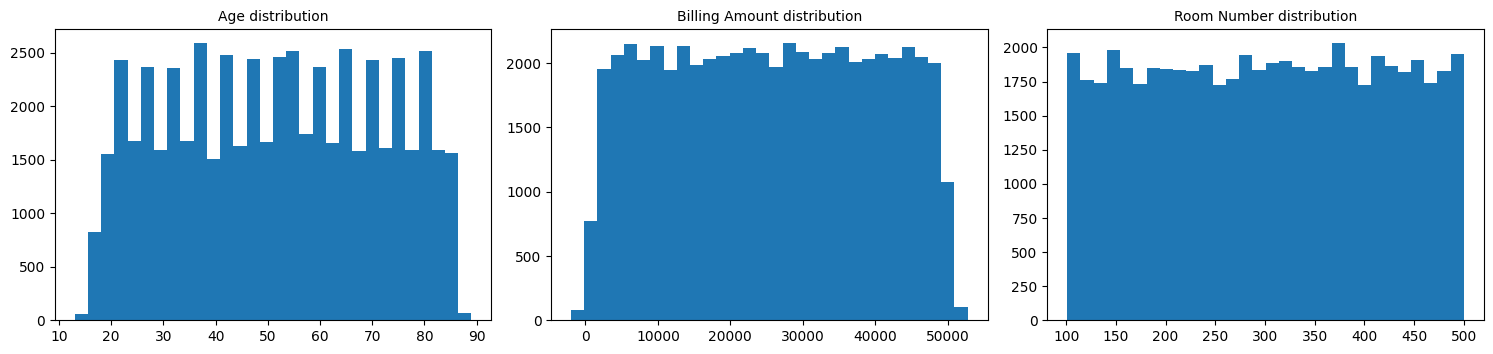

In [59]:
hist_loop(data=df[num_cols],
          rows=3,
          cols=4,
          figsize=(20,10))

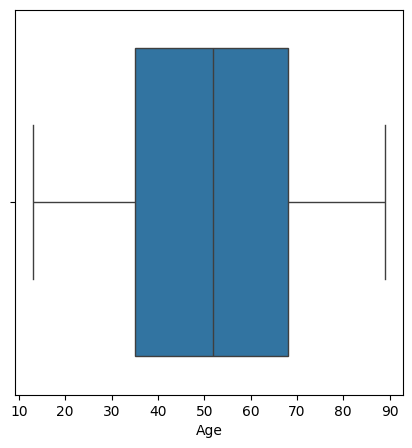

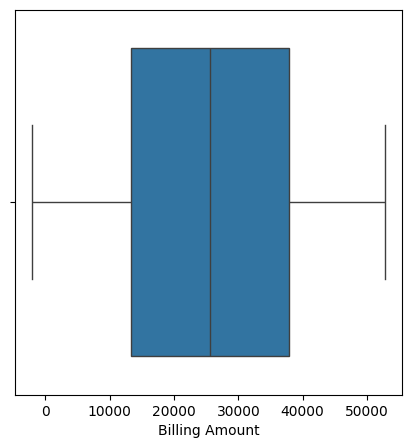

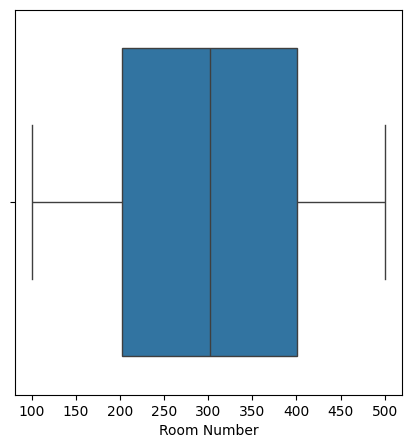

In [60]:
for col in num_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(df,x=col)

In [61]:
df['Number 100-199'] = ((df['Room Number'] >= 100) & (df['Room Number'] < 200)).astype(int)
df['Number 200-399'] = ((df['Room Number'] >= 200) & (df['Room Number'] < 400)).astype(int)
df['Number >=400'] = (df['Room Number'] >= 400).astype(int)

In [62]:
num_cols=num_cols.delete(2)

In [63]:
df.drop('Room Number',axis=1,inplace=True)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df[num_cols]=scaler.fit_transform(df[num_cols])

In [65]:
test_results=test_results.replace(['Normal','Abnormal'],1)
test_results=test_results.replace('Inconclusive',0)
df['Test Results']=test_results

C:\Users\Dell\AppData\Local\Temp\ipykernel_20228\789071700.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_results=test_results.replace('Inconclusive',0)


In [66]:
df

,Age,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Discharge Date_2023,Discharge Date_2024,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Number 100-199,Number 200-399,Number >=400,Test Results
0,-1.098824,-0.470261,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
1,0.533639,0.570250,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1.247842,0.169990,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,-1.200853,0.870465,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
4,-0.435636,-0.795211,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,-0.486651,-1.610589,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
55496,0.482625,0.416462,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
55497,-0.690708,0.146464,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
55498,-0.435636,0.486357,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1


In [71]:
from scipy.stats import ttest_ind, t

def t_ind_test(s1: pd.Series,
               s2: pd.Series,
               equal_var=False) -> tuple:
    """
    Returns t-value and p-value
    """
    
    dfreedom = len(s1) + len(s2) - 2
    t_val, p_val = ttest_ind(s1, s2, equal_var=equal_var)
    return t_val, p_val

def test_loop(data: pd.DataFrame,
              prefix: str) -> pd.DataFrame:
    """
    Returns a table of t test result sorted by p-values 
    with colored bars (green for positive values and red for negative ones)
    """

    category_df = data.filter(regex=prefix, axis=1)
    category = sorted(list(category_df.columns))

    test_results = []
    for i in category:
        non_category_ratings = data[data[i] == 0]['Test Results']
        category_ratings = data[data[i] == 1]['Test Results']
        test_results.append((i.replace(prefix, ''),) + t_ind_test(category_ratings, non_category_ratings))
        test_results_df = (pd.DataFrame(test_results, columns=[prefix + 'name', 't-value', 'p-value'])
                       .sort_values('p-value')
                       .set_index(prefix + 'name')
    )
    test_results_df = test_results_df.style.bar(align='mid', color=['#d65f5f', '#5fba7d'])
    return test_results_df

In [72]:
test_loop(df, 'Blood Type_')

(6969,)
(48531,)
(6947,)
(48553,)
(6945,)
(48555,)
(6945,)
(48555,)
(6944,)
(48556,)
(6917,)
(48583,)
(6877,)
(48623,)


,t-value,p-value
Blood Type_name,,
B+,-1.870124,0.061499
AB-,1.286817,0.198191
B-,0.783368,0.433432
AB+,-0.743962,0.456919
O+,0.704238,0.481303
O-,0.479719,0.631439
A-,0.188480,0.850505


In [69]:
test_loop(df,'Number')

s1:  12    1
14    1
16    1
20    1
23    0
Name: Test Results, dtype: int64
s2:  0    1
1    0
2    1
3    1
4    1
Name: Test Results, dtype: int64
s1:  0    1
1    0
2    1
5    1
6    0
Name: Test Results, dtype: int64
s2:  3     1
4     1
12    1
14    1
15    0
Name: Test Results, dtype: int64
s1:  3     1
4     1
15    0
17    1
19    1
Name: Test Results, dtype: int64
s2:  0    1
1    0
2    1
5    1
6    0
Name: Test Results, dtype: int64


,t-value,p-value
Numbername,,
200-399,-2.132604,0.032962
>=400,2.098170,0.035900
100-199,0.368370,0.712601


In [70]:
test_loop(df,'Medication_')

s1:  1     0
3     1
5     1
26    1
30    0
Name: Test Results, dtype: int64
s2:  0    1
2    1
4    1
6    0
7    0
Name: Test Results, dtype: int64
s1:  11    0
13    1
21    1
22    0
23    0
Name: Test Results, dtype: int64
s2:  0    1
1    0
2    1
3    1
4    1
Name: Test Results, dtype: int64
s1:  0     1
6     0
7     0
9     0
10    1
Name: Test Results, dtype: int64
s2:  1    0
2    1
3    1
4    1
5    1
Name: Test Results, dtype: int64
s1:  4     1
12    1
19    1
28    1
31    1
Name: Test Results, dtype: int64
s2:  0    1
1    0
2    1
3    1
5    1
Name: Test Results, dtype: int64


,t-value,p-value
Medication_name,,
Lipitor,-1.382539,0.166824
Ibuprofen,0.793074,0.427746
Paracetamol,-0.437360,0.661856
Penicillin,0.013917,0.988896
